# Quantity Prediction Project
by Jasmine Chung

This project is to predict "quantity". The overall content is as following:

1. Business Problem
2. Data Overview (省略 Exploratory Data Analysis (EDA))
3. Data Cleaning (省略 Feature Engineering)
4. Feature Seleection
5. Data Encoding
6. Machine Learning Models (省略 Model Selection - Cross Validation)
8. Grid Search
9. Learning Curve
10. Pipeline

# 1. Business Problem

Business Objective

- The primary goal is to build a machine learning model to predict the "quantity" of online sales dataset.

# 2. Data Overview 

To begin with, a dataset overview including the brief scan of the head, the understanding of data types, missing values number, and duplication can help further imputation and analysis.

In [1]:
import pandas as pd

# Load the dataset
file_path = 'online_0616d25.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df.head()

,Description,Quantity,Year,Quarter,Month,DateofWeek,Hour,InvoiceDate,UnitPrice,Country,Discount,PaymentMethod,ShippingCost,Category,ShipmentProvider,WarehouseLocation
0,Wireless Mouse,18,2025,Q1,Jan,Wed,0,2025/1/1 00:00,28.65,Norway,0.41,Bank Transfer,28.06,Accessories,UPS,London
1,Office Chair,33,2025,Q1,Jan,Wed,1,2025/1/1 01:00,85.88,Netherlands,0.05,Bank Transfer,11.00,Accessories,FedEx,Paris
2,White Mug,47,2025,Q1,Jan,Wed,2,2025/1/1 02:00,75.47,Portugal,0.28,Credit Card,14.92,Apparel,UPS,Berlin
3,Office Chair,18,2025,Q1,Jan,Wed,3,2025/1/1 03:00,67.85,United States,0.36,Credit Card,16.41,Stationery,Royal Mail,Amsterdam
4,Blue Pen,45,2025,Q1,Jan,Wed,4,2025/1/1 04:00,98.30,Spain,0.06,Credit Card,25.36,Furniture,UPS,Paris


In [14]:
# Understand the Non-Null Count and Dtype of the data
df.info()

# For numerical columns, get descriptive statistics 
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5934 entries, 0 to 5933
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Description        5934 non-null   object 
 1   Quantity           5934 non-null   int64  
 2   Year               5934 non-null   int64  
 3   Quarter            5934 non-null   object 
 4   Month              5934 non-null   object 
 5   DateofWeek         5934 non-null   object 
 6   Hour               5934 non-null   int64  
 7   InvoiceDate        5934 non-null   object 
 8   UnitPrice          5934 non-null   float64
 9   Country            5934 non-null   object 
 10  Discount           5934 non-null   float64
 11  PaymentMethod      5934 non-null   object 
 12  ShippingCost       5589 non-null   float64
 13  Category           5934 non-null   object 
 14  ShipmentProvider   5934 non-null   object 
 15  WarehouseLocation  5489 non-null   object 
dtypes: float64(3), int64(3),

,Quantity,Year,Hour,UnitPrice,Discount,ShippingCost
count,5934.000000,5934.0,5934.000000,5934.000000,5934.000000,5589.000000
mean,22.193630,2025.0,11.490900,47.843335,0.276666,17.519687
std,18.273797,0.0,6.925393,34.292656,0.237067,7.255811
min,-50.000000,2025.0,0.000000,-99.600000,0.000000,5.010000
25%,11.000000,2025.0,5.000000,23.717500,0.120000,11.170000
50%,23.000000,2025.0,11.000000,49.970000,0.260000,17.610000
75%,36.000000,2025.0,17.000000,75.790000,0.380000,23.730000
max,49.000000,2025.0,23.000000,100.000000,1.999605,29.980000


### ・Numerical Data

In [ ]:
# 數值欄位
numerical_cols = df.select_dtypes(include=['int64', 'float64'])
num_cols = numerical_cols

### ・Categorical Data

In [20]:
# 非數值欄位
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

In [21]:
df['Year'] = df['Year'].astype('object')
df['Hour'] = df['Hour'].astype('object')

# df = df.drop(columns=['Date'], errors='ignore')

print(df.dtypes)

Description           object
Quantity               int64
Year                  object
Quarter               object
Month                 object
DateofWeek            object
Hour                  object
InvoiceDate           object
UnitPrice            float64
Country               object
Discount             float64
PaymentMethod         object
ShippingCost         float64
Category              object
ShipmentProvider      object
WarehouseLocation     object
dtype: object


# 3. Missing Values Imputation

In [ ]:
df['ShippingCost'] = df['ShippingCost'].fillna(df['ShippingCost'].median())
df['WarehouseLocation'] = df['WarehouseLocation'].fillna(df['WarehouseLocation'].mode()[0])

In [28]:
# Check the missing values and data types in the data frame
df_cleaned = df
df_cleaned.isnull().sum()

Description          0
Quantity             0
Year                 0
Quarter              0
Month                0
DateofWeek           0
Hour                 0
InvoiceDate          0
UnitPrice            0
Country              0
Discount             0
PaymentMethod        0
ShippingCost         0
Category             0
ShipmentProvider     0
WarehouseLocation    0
dtype: int64

# 4. Feature Selection

### ・Random Forest Regressor for Feature Selection

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np

# Define your categorical columns
categorical_columns = [col for col in categorical_columns ]
#  # Specify your categorical columns

# Define the encoder and the transformation
column_transformer = ColumnTransformer([
    ('encoder', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
], remainder='passthrough')

# Separate features and target
X = df_cleaned.drop('Quantity', axis=1)
y = df_cleaned['Quantity']

# Encode the features
X_encoded = column_transformer.fit_transform(X)
feature_names_encoded = column_transformer.get_feature_names_out()

# Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and fit the RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get the feature importances
importances = model.feature_importances_

# Combine feature names and their importances, sort them, and select the top 15
features_importances = sorted(zip(feature_names_encoded, importances), key=lambda x: x[1], reverse=True)[:15]

# Extract just the feature names for the top 15
top_features = [feature for feature, importance in features_importances]

# Print the top 15 features
print("Top 15 Features based on Importance:")
for feature in top_features:
    print(feature)


Top 15 Features based on Importance:
remainder__UnitPrice
remainder__ShippingCost
remainder__Discount
encoder__WarehouseLocation_Paris
encoder__ShipmentProvider_DHL
encoder__ShipmentProvider_Royal Mail
encoder__PaymentMethod_Credit Card
encoder__PaymentMethod_paypall
encoder__Category_Electronics
encoder__DateofWeek_Fri
encoder__ShipmentProvider_UPS
encoder__Category_Stationery
encoder__Category_Accessories
encoder__Category_Apparel
encoder__DateofWeek_Sun


In [31]:
# Trim the first word and underscores
feature_selected = ['__'.join(feature.split('__')[1:]) for feature in top_features]

# Print the trimmed feature names
print("Trimmed Features:")
for feature in feature_selected:
    print(feature)

Trimmed Features:
UnitPrice
ShippingCost
Discount
WarehouseLocation_Paris
ShipmentProvider_DHL
ShipmentProvider_Royal Mail
PaymentMethod_Credit Card
PaymentMethod_paypall
Category_Electronics
DateofWeek_Fri
ShipmentProvider_UPS
Category_Stationery
Category_Accessories
Category_Apparel
DateofWeek_Sun


# 5. Encoding Categorical Variables

### ・One-Hot Encoding

In [33]:
from sklearn.preprocessing import OneHotEncoder

# Identifying categorical columns in 'df_cleaned'
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns.tolist()


# Initializing the OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, drop=None)  # `drop='first'` to avoid dummy variable trap

# Fitting and transforming the categorical columns
# Note: `.fit_transform()` expects a 2D array, hence the double brackets `[[column]]`
encoded_data = ohe.fit_transform(df_cleaned[categorical_cols])

# Creating a DataFrame with the encoded data
# `get_feature_names_out()` gives new column names
encoded_df = pd.DataFrame(encoded_data, columns=ohe.get_feature_names_out(categorical_cols))



# Concatenating the encoded_df with the original DataFrame (minus the categorical columns)
df_cleaned_numeric = df_cleaned.drop(columns=categorical_cols)
df_encoded = pd.concat([df_cleaned_numeric.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

# Display the first few rows to verify
print(df_encoded.head())


   Quantity  UnitPrice  Discount  ShippingCost  Description_Backpack  \
0        18      28.65      0.41         28.06                   0.0   
1        33      85.88      0.05         11.00                   0.0   
2        47      75.47      0.28         14.92                   0.0   
3        18      67.85      0.36         16.41                   0.0   
4        45      98.30      0.06         25.36                   0.0   

   Description_Blue Pen  Description_Desk Lamp  Description_Headphones  \
0                   0.0                    0.0                     0.0   
1                   0.0                    0.0                     0.0   
2                   0.0                    0.0                     0.0   
3                   0.0                    0.0                     0.0   
4                   1.0                    0.0                     0.0   

   Description_Notebook  Description_Office Chair  ...  Category_Stationery  \
0                   0.0                    

### ・Create "df_selected" data frame

In [34]:
# Include 'quantity' in the data frame
df_selected = df_encoded[feature_selected]
df_selected['Quantity'] = df_encoded['Quantity']
df_selected.head()

C:\Users\2401050\AppData\Local\Temp\ipykernel_12688\2709672253.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Quantity'] = df_encoded['Quantity']


,UnitPrice,ShippingCost,Discount,WarehouseLocation_Paris,ShipmentProvider_DHL,ShipmentProvider_Royal Mail,PaymentMethod_Credit Card,PaymentMethod_paypall,Category_Electronics,DateofWeek_Fri,ShipmentProvider_UPS,Category_Stationery,Category_Accessories,Category_Apparel,DateofWeek_Sun,Quantity
0,28.65,28.06,0.41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,18
1,85.88,11.00,0.05,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,33
2,75.47,14.92,0.28,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,47
3,67.85,16.41,0.36,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,18
4,98.30,25.36,0.06,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,45


In [35]:
# Examine the data frame by exporting it
df_selected.to_csv('df_selected0620_25.csv', index=False)

### ・Heat Map: examine the relationship of selected features

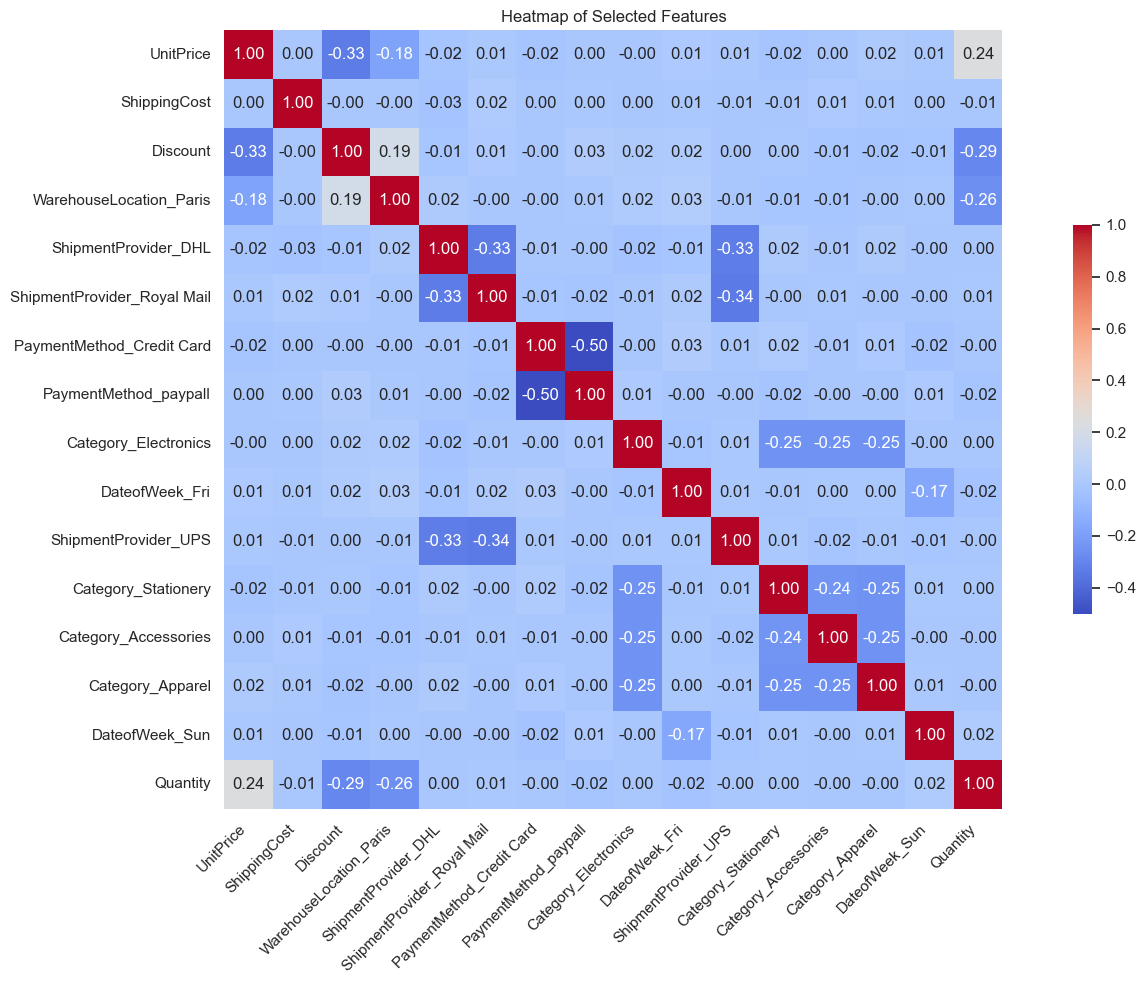

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df_selected.corr()

# Generate a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={'shrink': .5})
plt.title('Heatmap of Selected Features')
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# 6. Machine Learning Models

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X = df_selected.drop('Quantity', axis=1)
y = df_selected['Quantity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize the Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 432.1558550968829
Root Mean Squared Error (RMSE): 20.78835864364676
R-squared (R²): -0.33224213808620573


### ・Ensemble

1. Bagging: Random Forest Model
2. Boosting: Gradient Boosting Model
3. Stacking: Combination of Random Forest and Gradient Boosting Models

### 1. Bagging: Random Forest Model

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X = df_selected.drop('Quantity', axis=1)
y = df_selected['Quantity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate R-squared
RF_r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {RF_r2}")

Mean Squared Error (MSE): 228.4027391743892
Root Mean Squared Error (RMSE): 15.112999013246485
R-squared (R²): 0.29588422789223234


### 2. Boosting: Gradient Boosting Machines (GBM)

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X = df_selected.drop('Quantity', axis=1)
y = df_selected['Quantity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate R-squared (R²)
GB_r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {GB_r2}")

Mean Squared Error (MSE): 206.8277980564159
Root Mean Squared Error (RMSE): 14.381508893590265
R-squared (R²): 0.36239506037337277


### 3. Stacking: combine random forest and GBM models

In [72]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train base models (Random Forest and Gradient Boosting)
rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Generate predictions from base models
rf_predictions = rf_model.predict(X_test)
gb_predictions = gb_model.predict(X_test)

# Combine predictions as input to meta-model
meta_features = np.column_stack((rf_predictions, gb_predictions, X_test))

# Initialize and train the meta-model (e.g., Linear Regression)
meta_model = LinearRegression()
meta_model.fit(meta_features, y_test)

# Make final predictions using meta-model
final_predictions = meta_model.predict(meta_features)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, final_predictions)
print("MSE:", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# Calculate R-squared (R²)
stacking_r2 = r2_score(y_test, final_predictions)
print("R-squared:", stacking_r2)



MSE: 203.94464956545892
RMSE: 14.280919072855882
R-squared: 0.3712831776225338


Here is the bar chart containing all R-squared from the Ensemble Models above. 

C:\Users\2401050\AppData\Local\Temp\ipykernel_12688\1053138155.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R-squared Score', data=data, palette='Blues')


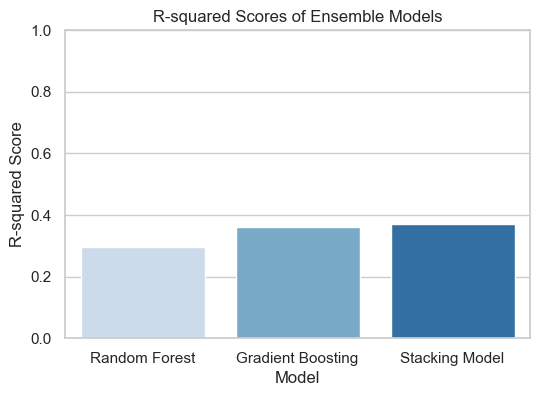

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming RF_r2, GB_r2, and stacking_r2 are your R-squared scores
# Replace these with the actual scores
r2_scores = [RF_r2, GB_r2, stacking_r2]  
models = ['Random Forest', 'Gradient Boosting', 'Stacking Model']

# Convert to DataFrame for seaborn
data = pd.DataFrame({
    'Model': models,
    'R-squared Score': r2_scores
})

# Create the bar chart using seaborn
plt.figure(figsize=(6, 4))
sns.barplot(x='Model', y='R-squared Score', data=data, palette='Blues')

plt.title('R-squared Scores of Ensemble Models')
plt.xlabel('Model')
plt.ylabel('R-squared Score')
plt.ylim([0, 1])
plt.show()


From this form it is known that the R-squared of the stacking model is the most preferred.

# 7. Grid Search

### ・Refinement of the Stacking Model from Grid Search

### 用完整資料重複一次 Grid + Stacked

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# ✅ 1. 準備資料
X = df_cleaned.drop(columns=["Quantity"])  # 這邊用原始欄位
y = df_cleaned["Quantity"]

# ✅ 2. 欄位分類
num_cols = X.select_dtypes(include=["number"]).columns
cat_cols = X.select_dtypes(include=["object"]).columns

# ✅ 3. 建立 ColumnTransformer（缺值處理 + OneHot）
preprocessor = ColumnTransformer(transformers=[
    ("num", SimpleImputer(strategy="median"), num_cols),
    ("cat", Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ]), cat_cols)
])

# ✅ 4. 建立 Stacking 模型
base_estimators = [
    ("rf", RandomForestRegressor(random_state=42)),
    ("gb", GradientBoostingRegressor(random_state=42))
]

stacking_model = StackingRegressor(
    estimators=base_estimators,
    final_estimator=LinearRegression()
)

# ✅ 5. Pipeline：前處理 + Scaling + Stacking
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("scaler", StandardScaler(with_mean=False)),  # with_mean=False 避免 sparse matrix 錯誤
    ("stacking", stacking_model)
])

# ✅ 6. GridSearch 調參
param_grid = {
    "stacking__rf__n_estimators": [50, 100],
    "stacking__gb__n_estimators": [50, 100],
    "stacking__final_estimator__fit_intercept": [True, False]
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

grid = GridSearchCV(pipeline, param_grid, cv=5, scoring="neg_mean_squared_error", n_jobs=-1)
grid.fit(X_train, y_train)

# ✅ 7. 評估
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Parameters:", grid.best_params_)
print("MSE:", mse)
print("R²:", r2)


In [ ]:
# 確保 y_pred 是一個 Series 並加上名稱
y_pred_series = pd.Series(y_pred, index=X_test.index, name="Predicted_Quantity")

# 合併預測與原始測試資料（選擇性：你可以選擇只保留部分欄位）
result_df = X_test.copy()
result_df["Actual_Quantity"] = y_test
result_df["Predicted_Quantity"] = y_pred_series

# 匯出成 CSV 檔
result_df.to_csv("0620_predicted_quantity_results.csv", index=False)


🔍 df_selected.columns:
 ['UnitPrice', 'ShippingCost', 'Discount', 'WarehouseLocation_Paris', 'ShipmentProvider_DHL', 'ShipmentProvider_Royal Mail', 'PaymentMethod_Credit Card', 'PaymentMethod_paypall', 'Category_Electronics', 'DateofWeek_Fri', 'ShipmentProvider_UPS', 'Category_Stationery', 'Category_Accessories', 'Category_Apparel', 'DateofWeek_Sun', 'Quantity']
🔍 num_cols:
 Index(['UnitPrice', 'Discount', 'ShippingCost'], dtype='object')
🔍 cat_cols:
 Index(['Description', 'Year', 'Quarter', 'Month', 'DateofWeek', 'Hour',
       'InvoiceDate', 'Country', 'PaymentMethod', 'Category',
       'ShipmentProvider', 'WarehouseLocation'],
      dtype='object')


### 匯出結果

In [65]:
# 匯出預測結果與實際值
import pandas as pd

# 確保 X_test 是 array，就建立一個 row index
num_rows = len(y_test)

results_df = pd.DataFrame({
    "Actual_Quantity": y_test.values,  # 取出 Series 的 array 值
    "Predicted_Quantity": stacked_predictions_refined.flatten()  # 若是 array 並需攤平成 1D
})

# 存成 CSV
output_path = "stacking_predictions.csv"
results_df.to_csv(output_path, index=False)

output_path


'stacking_predictions.csv'

# 8. Learning Curve

To examine if the model is overfitting or underfitting, learning curve will be used here.

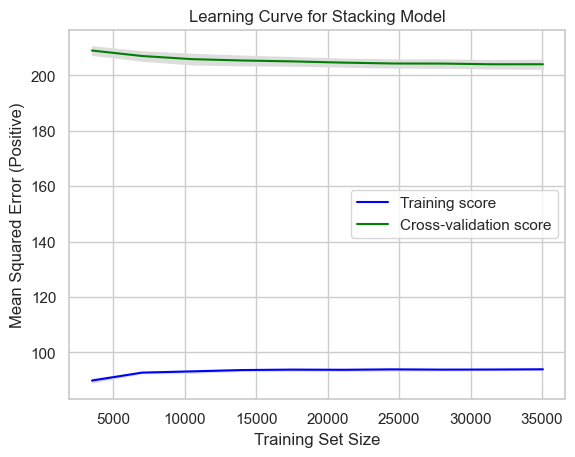

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Re-defining the stacked model as per the refined code provided
model1 = RandomForestRegressor(random_state=42)
model2 = GradientBoostingRegressor(random_state=42)
stacked_model = VotingRegressor(estimators=[('rf', model1), ('gb', model2)])

# Generating learning curve data with the scoring method updated to be positive
train_sizes, train_scores, test_scores = learning_curve(
    stacked_model, X, y, cv=5, 
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='neg_mean_squared_error'  # Using Negative MSE for demonstration, will convert to positive for visualization
)

# Calculate mean and standard deviation for training and test set scores, converting MSE to positive
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plotting the learning curve with adjustments for positive values
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")
plt.plot(train_sizes, train_mean, label="Training score", color='blue')
plt.plot(train_sizes, test_mean, label="Cross-validation score", color='green')

plt.title("Learning Curve for Stacking Model")
plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error (Positive)")
plt.legend(loc="best")
plt.show()


# 9. Pipeline

https://chat.openai.com/share/8a342064-e3a4-4732-8ccc-11283c45114f

In [ ]:
# Import necessary libraries
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import StackingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

In [ ]:
# Prepare the dataset to do pipeline
X = df_cleaned.drop('Quantity', axis=1)
y = df_cleaned['Quantity']

# Separate the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# List of categorical and numeric columns
categorical_cols = ['Year', 'Quarter', 'Month', 'DateofWeek', 'Hour', 'Country', 'PaymentMethod', 'Category','ShipmentProvider', 'WarehouseLocation']
numeric_cols = ['UnitPrice', 'Discount','ShippingCost']

# Pipeline for categorical features: imputation followed by one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Pipeline for numeric features: median imputation
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

# Combine preprocessing steps for categorical and numeric data
preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, categorical_cols),
    ('num', numeric_transformer, numeric_cols)
])

# Define base models for the stacking regressor
base_models = [
    ('random_forest', RandomForestRegressor(random_state=42)),
    ('gradient_boosting', GradientBoostingRegressor(random_state=42))
]

# Create the stacking regressor
stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=LinearRegression())

# Feature selector 
feature_selector = SelectKBest(score_func=f_regression, k=15)

# Complete pipeline: preprocessing, feature selection, and regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selector', feature_selector),  # Feature selection applied here
    ('regressor', stacking_regressor)  # Regression model
])


In [ ]:
# After some data manipulation, for successfully presenting the pipeline, realign using:
X_train = X_train.dropna()  # Adjust the data shape
y_train = y_train.loc[X_train.index]  # Ensure y_train aligns with the modified X_train

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

X_train shape: (32868, 14)
y_train shape: (32868,)


,steps,"[('preprocessor', ...), ('feature_selector', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


This is a simplified flow for processing the dataset from data cleaning to stacking regression as the estimator.

### ・Evaluate the pipeline model 

In [ ]:
# Predict on the testing set
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Squared Error: 294.8893863725679
Root Mean Squared Error: 17.172343648220178
R-squared: 0.2930565909636492


### ・Grid Search in Pipeline

In [ ]:
from sklearn.model_selection import GridSearchCV
# Define the parameter grid
#param_grid = {
#    'regressor__random_forest__n_estimators': [100, 200],  # Number of trees in the random forest
#    'regressor__random_forest__max_depth': [None, 10, 20],  # Maximum depth of each tree
#    'regressor__gradient_boosting__n_estimators': [100, 200],  # Number of boosting stages to perform
#    'regressor__gradient_boosting__learning_rate': [0.01, 0.1],  # Learning rate shrinks the contribution of each tree
#    'regressor__final_estimator__fit_intercept': [True, False]  # Whether to calculate the intercept for the final estimator
#}

# Set up the parameter grid
param_grid = {
    'regressor__random_forest__n_estimators': [200],
    'regressor__random_forest__max_depth': [20],
    'regressor__gradient_boosting__n_estimators': [200],
    'regressor__gradient_boosting__learning_rate': [0.1],
    'regressor__final_estimator__fit_intercept': [True, False]
}
# Grid search setup
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=10,
    n_jobs=-1
)

# Fit grid search to the data
grid_search.fit(X_train, y_train)

# Outputs
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score (MSE):", -grid_search.best_score_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 2/5; 2/2] START regressor__final_estimator__fit_intercept=False, regressor__gradient_boosting__learning_rate=0.1, regressor__gradient_boosting__n_estimators=200, regressor__random_forest__max_depth=20, regressor__random_forest__n_estimators=200
[CV 2/5; 2/2] END regressor__final_estimator__fit_intercept=False, regressor__gradient_boosting__learning_rate=0.1, regressor__gradient_boosting__n_estimators=200, regressor__random_forest__max_depth=20, regressor__random_forest__n_estimators=200;, score=-6.164 total time= 2.4min
[CV 5/5; 2/2] START regressor__final_estimator__fit_intercept=False, regressor__gradient_boosting__learning_rate=0.1, regressor__gradient_boosting__n_estimators=200, regressor__random_forest__max_depth=20, regressor__random_forest__n_estimators=200
[CV 5/5; 2/2] END regressor__final_estimator__fit_intercept=False, regressor__gradient_boosting__learning_rate=0.1, regressor__gradient_boosting__n_estimators=20

### ・Review the Best Parameters of the Model

Here is the best parameters from grid search.

In [ ]:
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score (MSE):", -grid_search.best_score_)

# Get the best estimator directly
best_model = grid_search.best_estimator_


Best parameters: {'regressor__final_estimator__fit_intercept': True, 'regressor__gradient_boosting__learning_rate': 0.1, 'regressor__gradient_boosting__n_estimators': 200, 'regressor__random_forest__max_depth': 20, 'regressor__random_forest__n_estimators': 200}
Best cross-validation score (MSE): 6.195736382075949


In [ ]:
# Best model after grid search
best_model = grid_search.best_estimator_

# Predict using the best model
y_pred = best_model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the scores
print("Mean Squared Error: {:.2f}".format(mse))
print("Root Mean Squared Error: {:.2f}".format(rmse))
print("R-squared: {:.2f}".format(r2))

Mean Squared Error: 6.35
Root Mean Squared Error: 2.52
R-squared: 0.33
